<a href="https://colab.research.google.com/github/dimaszuda/Prediction-of-Students-Performance/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split

In [6]:
!wget https://raw.githubusercontent.com/dimaszuda/Prediction-of-Students-Performance/main/StudentsPerformance.csv

--2023-06-24 07:38:35--  https://raw.githubusercontent.com/dimaszuda/Prediction-of-Students-Performance/main/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72036 (70K) [text/plain]
Saving to: ‘StudentsPerformance.csv’

StudentsPerformance 100%[===================>]  70.35K  --.-KB/s    in 0.01s   

2023-06-24 07:38:35 (6.16 MB/s) - ‘StudentsPerformance.csv’ saved [72036/72036]



In [279]:
df = pd.read_csv('StudentsPerformance.csv')

In [280]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [281]:
columns = ['gender',
           'parental level of education',
           'lunch',
           'test preparation course',
           'math score',
           'reading score',
           'writing score']

In [282]:
df = df[columns]

In [283]:
df = df.drop_duplicates()

In [284]:
df = df.rename(columns= {'parental level of education' : 'parent edu', 'test preparation course' : 'preparation'})

In [285]:
df['gender'].map(lambda x: {1: 'male', 2: 'female'}.get(x))

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: gender, Length: 1000, dtype: object

In [286]:
df['parent edu'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [287]:
df['parent edu'].map(lambda x: {1 : 'bachelor\'s degree',
                                2 : 'some college',
                                3 : 'master\'s degree',
                                4 : 'associate\' degree',
                                5 : 'high school',
                                6 : 'some high school'}.get(x))

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: parent edu, Length: 1000, dtype: object

In [288]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [289]:
df['lunch'].map(lambda x: {1 : 'standard', 2 : 'free/reduced'}.get(x))

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: lunch, Length: 1000, dtype: object

In [290]:
df['preparation'].unique()

array(['none', 'completed'], dtype=object)

In [291]:
df['preparation'].map(lambda x: {1 : 'none', 2 : 'completed'}.get(x))

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: preparation, Length: 1000, dtype: object

In [292]:
df = pd.get_dummies(df, prefix='', prefix_sep='')

In [293]:
df.tail(2)

,math score,reading score,writing score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
998,68,78,77,1,0,0,0,0,0,1,0,0,1,1,0
999,77,86,86,1,0,0,0,0,0,1,0,1,0,0,1


In [294]:
df = df.rename(columns= {'associate\'s degree' : 'parent\'s associate degree',
                         'bachelor\'s degree' : 'parent\'s bachelor degree',
                         'high school' : 'parent\'s high school',
                         'master\'s degree' : 'parent\'s master degree',
                         'some college' : 'parent\'s some college',
                         'some high school' : 'parent\'s some high school',
                         'free/reduced' : 'lunch free/reduced',
                         'standard' : 'lunch standard',
                         'completed' : 'test prepration completed',
                         'none' : 'test preparation none'})

In [295]:
order = ['male',
         'female',
         'parent\'s associate degree',
         'parent\'s bachelor degree',
         'parent\'s high school',
         'parent\'s master degree',
         'parent\'s some college',
         'parent\'s some high school',
         'lunch free/reduced',
         'lunch standard',
         'test prepration completed',
         'test preparation none',
         'math score',
         'reading score',
         'writing score']

In [296]:
df = df.reindex(columns=order)

In [297]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [298]:
df['average score'] = df['average score'].astype(int)

In [299]:
X = df.drop(df.columns[[15]], axis=1)

In [300]:
y = df['average score'].values.reshape(-1,1)

In [301]:
scaler = MinMaxScaler()

In [302]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=order)

In [303]:
y = scaler.fit_transform(y)
y = pd.DataFrame(y, columns=['Average Score'])

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [305]:
def build_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(15)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='mae',
                optimizer = optimizer,
                metrics=['mse'])
  return model

In [306]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                512       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________


In [307]:
history = model.fit(X_train, y_train, epochs=200, batch_size=100, shuffle=True, validation_split=0.1)

Epoch 1/200
9/9 [==============================] - 1s 37ms/step - loss: 0.1367 - mse: 0.0281 - val_loss: 0.1196 - val_mse: 0.0222
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 0.1197 - mse: 0.0219 - val_loss: 0.1095 - val_mse: 0.0209
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 0.1123 - mse: 0.0197 - val_loss: 0.1087 - val_mse: 0.0203
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1083 - mse: 0.0183 - val_loss: 0.1035 - val_mse: 0.0178
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.1024 - mse: 0.0162 - val_loss: 0.0975 - val_mse: 0.0155
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0972 - mse: 0.0145 - val_loss: 0.0947 - val_mse: 0.0142
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0932 - mse: 0.0132 - val_loss: 0.0913 - val_mse: 0.0128
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - loss: 0.0872 - mse: 0.0116 - va

In [315]:
def plot_history(history, title, xlabel='epochs', ylabel='mae mse'):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], 'b')
  plt.plot(history.history['mse'], 'r')
  plt.plot(history.history['val_loss'], 'g')
  plt.plot(history.history['val_mse'], 'orange')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(['mae', 'mse'], loc='upper right', fontsize='15')
  plt.show()

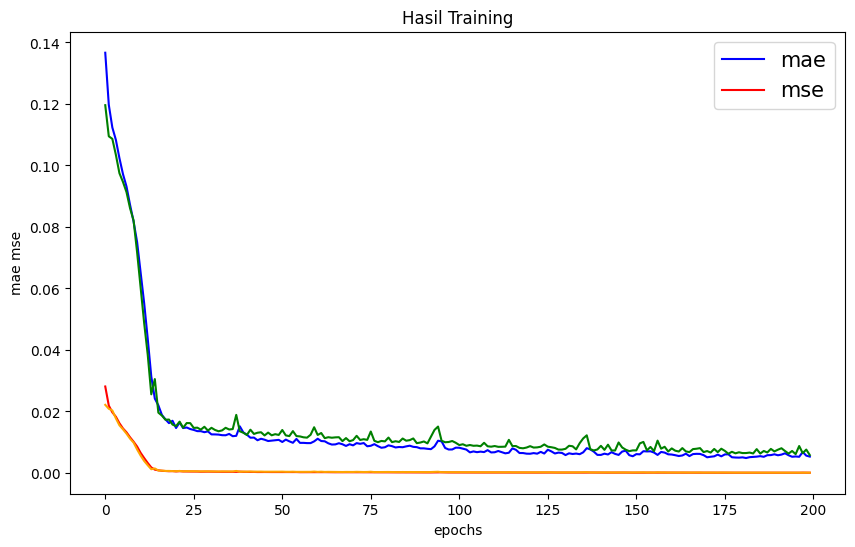

In [316]:
plot_history(history, "Hasil Training")

In [310]:
metric = model.get_metrics_result()

In [311]:
metric

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.005820618>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=9.123359e-05>}

In [312]:
prediksi = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [317]:
corr, _ = spearmanr(y_test, prediksi)

In [318]:
corr

0.9990215896014688